In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/new_new'

try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


/content/drive/MyDrive/Abdelrahman_s/new_new not found


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/new.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/new_new/new/images'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
def image_exists(image_path):
    return os.path.exists(os.path.join(image_folder, image_path))
# Filter out rows where the image file does not exist
train_df = train_df[train_df['filename'].apply(image_exists)]
valid_df = valid_df[valid_df['filename'].apply(image_exists)]
test_df = test_df[test_df['filename'].apply(image_exists)]

In [ ]:
train_csv_path = '/content/drive/MyDrive/Abdelrahman_s/train.csv'
valid_csv_path = '/content/drive/MyDrive/Abdelrahman_s/valid.csv'
test_csv_path = '/content/drive/MyDrive/Abdelrahman_s/test.csv'
image_folder = '/content/drive/MyDrive/Abdelrahman_s/new_new/new/images/new_new_images'
train_df = pd.read_csv(train_csv_path)
valid_df = pd.read_csv(valid_csv_path)
test_df = pd.read_csv(test_csv_path)
img_width = int(train_df['width'].values[0])
img_height = int(train_df['height'].values[0])
batch_size = 32
num_classes = len(train_df['class'].unique())


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.1,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=image_folder,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = datagen.flow_from_dataframe(
    valid_df,
    directory=image_folder,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    directory=image_folder,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers[-10:]:
    layer.trainable = True
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint('model_checkpoint_DenseNet201.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Create a TensorBoard callback
log_dir = '/content/drive/MyDrive/Abdelrahman_s/logsDensNet201'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=200,
    callbacks=[checkpoint, early_stopping, tensorboard_callback],
    verbose=1
)

# Save the final model
model.save('/content/drive/MyDrive/Abdelrahman_s/final_model_DenseNet201.h5')
model.save('final_model_DenseNet201.h5')
model.save('model_checkpoint_DenseNet201.h5')
model.save('/content/drive/MyDrive/Abdelrahman_s/model_checkpoint_DenseNet201.h5')
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Found 20117 validated image filenames belonging to 2 classes.
Found 124 validated image filenames belonging to 2 classes.
Found 1242 validated image filenames belonging to 2 classes.
74836368/74836368 [==============================] - 3s 0us/step
Epoch 1/200
629/629 [==============================] - ETA: 0s - loss: 0.4722 - accuracy: 0.7684
Epoch 1: val_loss improved from inf to 0.55826, saving model to model_checkpoint_DenseNet201.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


629/629 [==============================] - 240s 196ms/step - loss: 0.4722 - accuracy: 0.7684 - val_loss: 0.5583 - val_accuracy: 0.7661
Epoch 2/200
629/629 [==============================] - ETA: 0s - loss: 0.4007 - accuracy: 0.8139
Epoch 2: val_loss improved from 0.55826 to 0.37061, saving model to model_checkpoint_DenseNet201.h5
629/629 [==============================] - 110s 175ms/step - loss: 0.4007 - accuracy: 0.8139 - val_loss: 0.3706 - val_accuracy: 0.8145
Epoch 3/200
629/629 [==============================] - ETA: 0s - loss: 0.3618 - accuracy: 0.8363
Epoch 3: val_loss did not improve from 0.37061
629/629 [==============================] - 107s 171ms/step - loss: 0.3618 - accuracy: 0.8363 - val_loss: 0.5708 - val_accuracy: 0.7258
Epoch 4/200
629/629 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8457
Epoch 4: val_loss improved from 0.37061 to 0.29790, saving model to model_checkpoint_DenseNet201.h5
629/629 [==============================] - 109s 173ms/ste

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Abdelrahman_s/new_new/new/images/new_new_images/cancer_5799.jpg'
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Abdelrahman_s/new_new/new/images/new_new_images/cancer_5799.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_72403]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Abdelrahman_s/logsDensNet201


<IPython.core.display.Javascript object>

1/1 [==============================] - 4s 4s/step


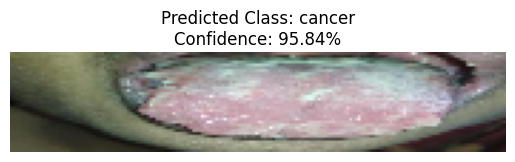

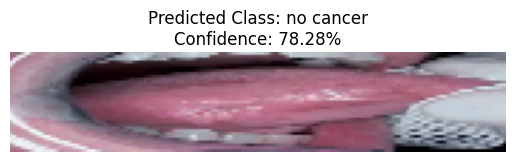

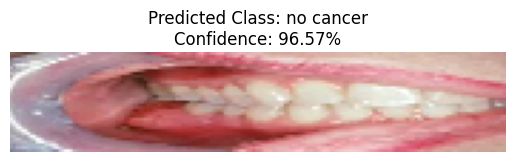

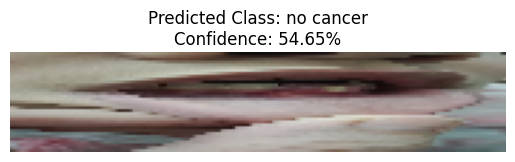

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/final_model_DenseNet201.h5')

from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_paths = ['/content/image2.jpg', '/content/slide25.png','/content/slide13.png','/content/image.jpg']
new_images = []

for image_path in image_paths:
    img = load_img(image_path, target_size=(img_width, img_height))
    img = img_to_array(img)
    img = img / 255.0
    new_images.append(img)

new_images = np.array(new_images)
predictions = model.predict(new_images)
class_labels = train_generator.class_indices
predicted_labels = [list(class_labels.keys())[np.argmax(pred)] for pred in predictions]

import matplotlib.pyplot as plt
for i in range(len(image_paths)):
    img = load_img(image_paths[i], target_size=(img_width, img_height))
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_labels[i]}\nConfidence: {predictions[i].max() * 100:.2f}%")
    plt.show()
